# The Newton Method

In [20]:
# https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/ 
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,1e-8,10)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        print("Old xn:",xn)
        xn = xn - fxn/Dfxn
        print("New xn:",xn)
    print('Exceeded maximum iterations. No solution found.')
    return None

# The computation of the reciprocal of a: 1/a

In [24]:
# newton(f,Df,x0,epsilon,max_iter)
def f(x):
    return x- 1/a  # Very Bad Idea !
def Df(x):
    return 1

In [33]:
a=5
x0=0.1
epsilon=0.00000001
max_iter=20
approx=newton(f,Df,x0,epsilon,max_iter)
print(approx)

Old xn: 0.1
New xn: -5.8352941176470585
Old xn: -5.8352941176470585
New xn: -3.781691937543919
Old xn: -3.781691937543919
New xn: -2.406853906663323
Old xn: -2.406853906663323
New xn: -1.472498708238102
Old xn: -1.472498708238102
New xn: -0.7993594007075483
Old xn: -0.7993594007075483
New xn: -0.18787946170945902
Old xn: -0.18787946170945902
New xn: 1.9753506341224776
Old xn: 1.9753506341224776
New xn: 1.6135570840554694
Old xn: 1.6135570840554694
New xn: 1.4832144333782953
Old xn: 1.4832144333782953
New xn: 1.4658652643432406
Old xn: 1.4658652643432406
New xn: 1.4655713154475905
Old xn: 1.4655713154475905
New xn: 1.4655712318767748
Found solution after 12 iterations.
1.4655712318767748


In [27]:
# Another way to define functions f and Df
f = lambda x: a-1/x
Df = lambda x: 1/(x**2)
approx = newton(f,Df,2,1e-6,10)
print(approx)

Old xn: 2
New xn: -8.0
Old xn: -8.0
New xn: -208.0
Old xn: -208.0
New xn: -130208.00000000001
Old xn: -130208.00000000001
New xn: -50862630208.000015
Old xn: -50862630208.000015
New xn: -7.761021455128991e+21
Old xn: -7.761021455128991e+21
New xn: -1.8070036208091755e+44
Old xn: -1.8070036208091755e+44
New xn: -9.795786256852412e+88
Old xn: -9.795786256852412e+88
New xn: -2.8787228516981575e+178


OverflowError: (34, 'Result too large')

In [34]:
f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x
approx = newton(f,Df,1,1e-10,10)
print(approx)

Old xn: 1
New xn: 2.0
Old xn: 2.0
New xn: 1.625
Old xn: 1.625
New xn: 1.4857859531772575
Old xn: 1.4857859531772575
New xn: 1.4659559197359893
Old xn: 1.4659559197359893
New xn: 1.4655713749070918
Old xn: 1.4655713749070918
New xn: 1.4655712318767877
Found solution after 6 iterations.
1.4655712318767877


In [40]:
print(f(1.4655712318767877))
print(f(1.465571231876787))
print(f(1.46557123187678))
print(f(1.4655712318767))
print(f(1.465571231876))
print(f(1.46557123187))
print(f(1.4655712318))
print(f(1.465571231))
print(f(1.46557123))
print(f(1.4655712))

6.927791673660977e-14
6.661338147750939e-14
4.1744385725905886e-14
-2.389199948993337e-13
-2.6978419498391304e-12
-2.3772983581693552e-11
-2.696518563993777e-10
-3.0796956096423855e-09
-6.592250745285355e-09
-1.1196888616282763e-07


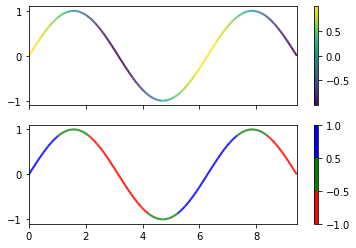

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

In [41]:
f = lambda x: x**(1/3)
Df = lambda x: (1/3)*x**(-2/3)
approx = newton(f,Df,0.1,1e-2,100)

Old xn: 0.1
New xn: -0.20000000000000004
Old xn: -0.20000000000000004
New xn: (0.40000000000000013-1.9729319640436202e-16j)
Old xn: (0.40000000000000013-1.9729319640436202e-16j)
New xn: (-0.8000000000000005+3.945863928087241e-16j)
Old xn: (-0.8000000000000005+3.945863928087241e-16j)
New xn: (1.6000000000000016-2.2684823506852416e-16j)
Old xn: (1.6000000000000016-2.2684823506852416e-16j)
New xn: (-3.200000000000003+4.536964701370481e-16j)
Old xn: (-3.200000000000003+4.536964701370481e-16j)
New xn: (6.400000000000009-2.0517709500105763e-15j)
Old xn: (6.400000000000009-2.0517709500105763e-15j)
New xn: (-12.800000000000015+4.103541900021152e-15j)
Old xn: (-12.800000000000015+4.103541900021152e-15j)
New xn: (25.60000000000002-5.36653152738823e-15j)
Old xn: (25.60000000000002-5.36653152738823e-15j)
New xn: (-51.20000000000003+1.0733063054776458e-14j)
Old xn: (-51.20000000000003+1.0733063054776458e-14j)
New xn: (102.40000000000005-3.6993116366196196e-14j)
Old xn: (102.40000000000005-3.6993116

# A better idea: write down your fixed point iteration  and simplify !

## Hpw to compute a**(0.5): the square root ? 

### We solve  x**2 -a =0
### f(x)=x^2-a
### f'(x)=2 x 
### x_{n+1}=x_n-f(x_n)/f'(x_n)
### this gives x_{n+1}=(a+xn^2)/(2 xn) 

In [59]:
def mysqrt(a,x0,epsilon,max_iter):
    xn=x0
    for n in range(max_iter):
        xn=0.5*(a+xn**2)/xn
        print(xn)
    return xn    

In [75]:
a=2
x0=2
epsilon=0.00001
max_iter=20
mysqrt(a,x0,epsilon,max_iter)

1.5
1.4166666666666667
1.4142156862745099
1.4142135623746899
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095


1.414213562373095

# Compare   with Scipy
###  scipy.optimize.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)[source]¶

In [72]:
import scipy as sc
from scipy import optimize
import matplotlib.pyplot as plt

In [73]:
f = lambda x: x**2-2
Df = lambda x: 2*x


In [76]:
optimize.newton(f, x0+2, fprime=Df, args=(), tol=1.48e-08, maxiter=10, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

1.4142135623730951